In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from pylab import *
cmap = cm.get_cmap('coolwarm', 10) 


/tmp/ipykernel_76586/606843666.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm', 10)


In [2]:
path = '/data05/nmahesh/OVRO-LWA_Beam-models/'

In [20]:
hf = h5py.File(path+'OVRO-LWA_MROsoil_updatedheight.h5', 'r')

In [21]:
hf.keys()

<KeysViewHDF5 ['Metadata', 'X_pol_Efields', 'Y_pol_Efields', 'freq_Hz', 'phi_pts', 'theta_pts']>

In [22]:
np.shape(hf["X_pol_Efields/etheta"][:]) #(Nfreq, Ntheta, Nphi)

(91, 91, 361)

Text(0.5, 0, 'Freq(MHz)')

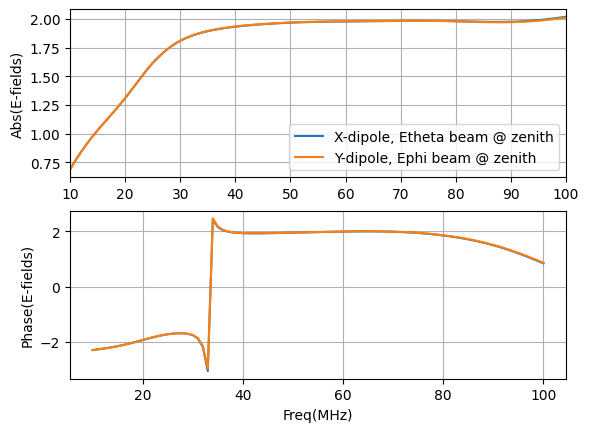

In [26]:
plt.subplot(2,1,1)
plt.plot(hf['freq_Hz'][:]/1e6,np.abs(hf["X_pol_Efields/etheta"][:][:,0,0]),label='X-dipole, Etheta beam @ zenith')
plt.plot(hf['freq_Hz'][:]/1e6,np.abs(hf["Y_pol_Efields/ephi"][:][:,0,0]), label='Y-dipole, Ephi beam @ zenith')

plt.legend()
plt.grid()
plt.xlim([10,100])
plt.ylabel('Abs(E-fields)')

plt.subplot(2,1,2)
plt.plot(hf['freq_Hz'][:]/1e6,np.angle(hf["X_pol_Efields/etheta"][:][:,0,0]),label='X-dipole, Etheta beam @ zenith')
plt.plot(hf['freq_Hz'][:]/1e6,np.angle(hf["Y_pol_Efields/ephi"][:][:,0,0]),label='Y-dipole, Ephi beam @ zenith')

plt.ylabel('Phase(E-fields)')
plt.grid()
plt.xlabel('Freq(MHz)')

In [34]:
P,T = np.meshgrid(hf['phi_pts'],hf['theta_pts'])

Text(0.5, 1.0, 'X-dipole Ephi beam plot @50.0 MHz')

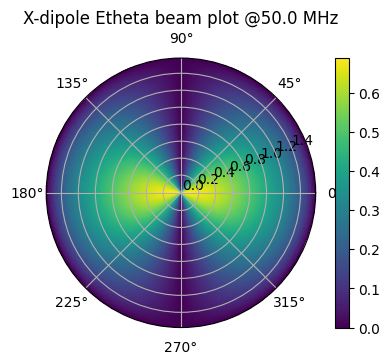

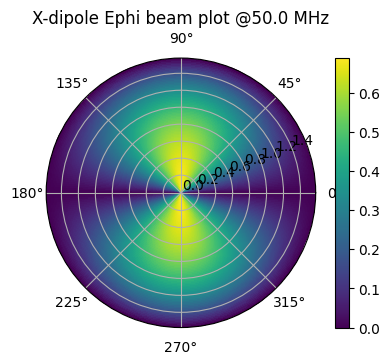

In [37]:
fig5, axs = plt.subplots(figsize=(5,3.5),subplot_kw=dict(polar=True))
plt.pcolormesh(P[:,:],T[:,:], np.abs(hf["X_pol_Efields/etheta"][:][0,:,:]))
plt.colorbar()
plt.title('X-dipole Etheta beam plot @'+str(hf['freq_Hz'][40]/1e6)+' MHz')

fig5, axs = plt.subplots(figsize=(5,3.5),subplot_kw=dict(polar=True))
plt.pcolormesh(P[:,:],T[:,:], np.abs(hf["X_pol_Efields/ephi"][:][0,:,:]))
plt.colorbar()
plt.title('X-dipole Ephi beam plot @'+str(hf['freq_Hz'][40]/1e6)+' MHz')

Text(0.5, 1.0, 'Y-dipole Ephi beam plot @50.0 MHz')

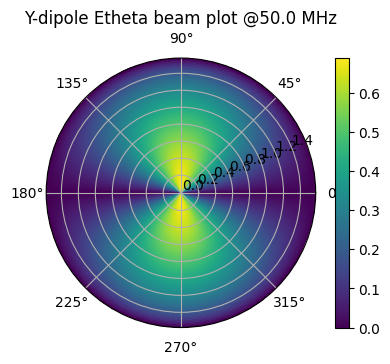

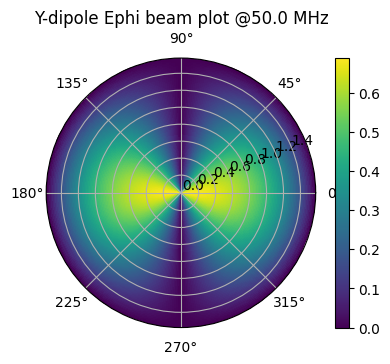

In [38]:
fig5, axs = plt.subplots(figsize=(5,3.5),subplot_kw=dict(polar=True))
plt.pcolormesh(P[:,:],T[:,:], np.abs(hf["Y_pol_Efields/etheta"][:][0,:,:]))
plt.colorbar()
plt.title('Y-dipole Etheta beam plot @'+str(hf['freq_Hz'][40]/1e6)+' MHz')

fig5, axs = plt.subplots(figsize=(5,3.5),subplot_kw=dict(polar=True))
plt.pcolormesh(P[:,:],T[:,:], np.abs(hf["Y_pol_Efields/ephi"][:][0,:,:]))
plt.colorbar()
plt.title('Y-dipole Ephi beam plot @'+str(hf['freq_Hz'][40]/1e6)+' MHz')

In [30]:
power_beam = np.abs(hf["X_pol_Efields/etheta"][:]**2 + hf["X_pol_Efields/ephi"][:]**2)

(10.0, 100.0)

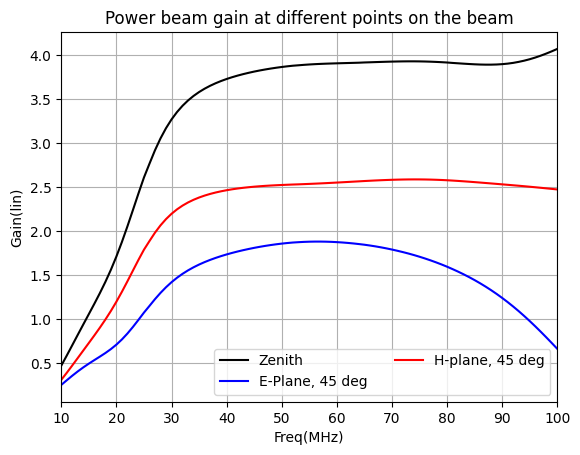

In [33]:
plt.plot()

plt.plot(hf['freq_Hz'][:]/1e6, power_beam[:,0,0],'k',label=r'Zenith')
plt.plot(hf['freq_Hz'][:]/1e6, power_beam[:,45,0],'b',label=r'E-Plane, 45 deg')
plt.plot(hf['freq_Hz'][:]/1e6, power_beam[:,45,90],'r',label=r'H-plane, 45 deg')

plt.title('Power beam gain at different points on the beam')
plt.legend(ncols=2)
plt.ylabel('Gain(lin)')
plt.xlabel('Freq(MHz)')
plt.grid()
plt.xlim([10,100])